In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import mnist#download mnist data and split into train and test sets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Using TensorFlow backend.


In [2]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
###Seeing dimensions of the different sets
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 28, 28)
(50000,)
(10000, 28, 28)
(10000,)
(10000, 28, 28)
(10000,)


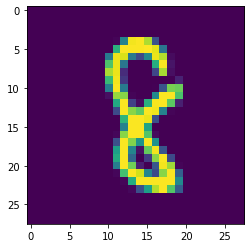

In [4]:
##Seeing example of random images
image_no=5
img=X_train[image_no]
plt.imshow(img)

In [5]:
def normalize_X(X):
    X_norm=X/255
    return X_norm

In [6]:
def reshape_X(X):
    X_reshaped=X.reshape(X.shape[0],28,28,1)
    return X_reshaped

In [7]:
##BUILDING THE MODEL
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model

model = Sequential()#add model layers

model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#Pre processing the data
X_train=reshape_X(normalize_X(X_train))
X_val=reshape_X(normalize_X(X_val))
X_test=reshape_X(normalize_X(X_test))
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)


In [11]:
#train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 80s 2ms/step - loss: 0.1419 - accuracy: 0.9577 - val_loss: 0.0779 - val_accuracy: 0.9769
Epoch 2/10
50000/50000 [==============================] - 79s 2ms/step - loss: 0.0526 - accuracy: 0.9844 - val_loss: 0.0473 - val_accuracy: 0.9853
Epoch 3/10
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0474 - val_accuracy: 0.9868
Epoch 4/10
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0611 - val_accuracy: 0.9832
Epoch 5/10
50000/50000 [==============================] - 80s 2ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0492 - val_accuracy: 0.9871
Epoch 6/10
22592/50000 [============>.................] - ETA: 42s - loss: 0.0071 - accuracy: 0.9978

In [12]:
result = model.evaluate(X_train,y_train)
#print(result)
print("Training accuracy = "+str(result[1]*100))
result = model.evaluate(X_val,y_val)
#print(result)
print("Validation accuracy = "+str(result[1]*100))
#result = model.evaluate(X_test,y_test)
#print(result)
#print("Test accuracy = "+str(result[1]*100))

50000/50000 [==============================] - 17s 333us/step
Training accuracy = 99.90599751472473
10000/10000 [==============================] - 3s 345us/step
Validation accuracy = 98.7500011920929
